In [1]:
CLIENT_ID = '87c5153b7f74400ab86057e17cd8974a'
CLIENT_SECRET = 'e69632e3ef7448fd847a181730fac26c'
username = 'fv9r6gystti1tplk7pwckqi0e'
scope = 'user-read-recently-played'
token = 'BQC5IhDvlsMO7gOSMGIWi2JO3iiwZTB-vWFl6O4dYBy1wMZJsaQXD8-YjVZjXw0uGf9RjU0gaK7cu8OBMMLTABlvjIOXAdkVoQWdDm5Ehcchh9QyBU7U1Y6N73Ty2pVlcH7I_nVR5qtHJSGwBBeESHkuBcUJDWI'





this above details are user specific and are given by spotify

In [2]:
# spotify 
import spotipy #pip install spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [3]:
#basic lib
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import re
from datetime import datetime
import os
import scipy as sci
import plotly
import stat
import sklearn as sk
import warnings
import time 
import requests
warnings.filterwarnings("ignore")

from scipy.stats import skew
from scipy.stats import boxcox 

#scklit learn
import sklearn.preprocessing as pre
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.datasets import load_digits

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
#from sklearn.metrics import mean_absolute_error, plot_confusion_matrix
from sklearn.metrics import roc_auc_score , roc_curve

from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.multiclass import OneVsOneClassifier , OneVsRestClassifier , OutputCodeClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans


#plotly
import plotly
import chart_studio.plotly as py #pip install chart_studio
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)


# set styles and defaults
#pd.set_option('max_columns', None)
#pd.set_option('max_rows', 1000)
pd.options.display.max_rows = 1000

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
sns.set_context('talk')
sns.set_style('whitegrid')
#sns.set_palette('rainbow')
#sns.set(context='talk' , style = 'whitegrid', palette = 'rainbow')
#sns.set_palette("RdPu", 10)


a user defined function to get audio features from spotify

In [4]:
def get_user_playlist(username, playlist_id, sp):
    offset=0
    return sp.user_playlist_tracks(username, playlist_id, limit=100, fields=None, offset=offset, market=None)['items']
     



create_dataframe 

In [5]:
def create_dataframe(playlist_songs):
    
    playlist_df = pd.DataFrame()

    playlist_df['artistName'] = np.array([song['track']["album"]["artists"][0]["name"] for song in playlist_songs])
    
    artistName1 = []
    for i in range(len(playlist_songs)):
        try :
            artistName1 =  artistName1 + [playlist_songs[i]['track']['album']['artists'][1]['name']]
        except IndexError :
            artistName1 =  artistName1 + [playlist_songs[i]['track']['album']['artists'][0]['name']]
    
    playlist_df['artistName_1'] = artistName1
    playlist_df['albumName'] = np.array([song['track']["album"]["name"] for song in playlist_songs])
    playlist_df['trackName'] = np.array([song['track']['name'] for song in playlist_songs])
    playlist_df['release_date'] = np.array([song['track']['album']['release_date'] for song in playlist_songs])
    playlist_df['album_type'] = np.array([song['track']['album']['album_type'] for song in playlist_songs])
    playlist_df['id'] = np.array([song['track']['id'] for song in playlist_songs])
    playlist_df['duration_ms'] = np.array([song['track']['duration_ms'] for song in playlist_songs])
    playlist_df['explicit'] = np.array([song['track']['explicit'] for song in playlist_songs])
    playlist_df['popularity'] = np.array([song['track']['popularity'] for song in playlist_songs])
    
    
    
    audio_analysis = sp.audio_features(playlist_df['id'])    
    
    playlist_df['danceability'] = np.array([audio_info['danceability'] for audio_info in audio_analysis])
    playlist_df['loudness'] = np.array([audio_info['loudness'] for audio_info in audio_analysis])
    playlist_df['tempo'] = np.array([audio_info['tempo'] for audio_info in audio_analysis])
    playlist_df['acousticness'] = np.array([audio_info['acousticness'] for audio_info in audio_analysis])
    playlist_df['energy'] = np.array([audio_info['energy'] for audio_info in audio_analysis])
    playlist_df['valence'] = np.array([audio_info['valence'] for audio_info in audio_analysis])
    playlist_df['liveness'] = np.array([audio_info['liveness'] for audio_info in audio_analysis])
    playlist_df['loudness'] = np.array([audio_info['loudness'] for audio_info in audio_analysis])
    playlist_df['speechiness'] = np.array([audio_info['speechiness'] for audio_info in audio_analysis])
    playlist_df['instrumentalness'] = np.array([audio_info['instrumentalness'] for audio_info in audio_analysis])
    playlist_df['key'] = np.array([audio_info['key'] for audio_info in audio_analysis])
    playlist_df['time_signature'] = np.array([audio_info['time_signature'] for audio_info in audio_analysis])
    playlist_df['mode'] = np.array([audio_info['mode'] for audio_info in audio_analysis])


    return playlist_df

In [6]:
l1 = 'aditya'  

imported 5 of my spotify playlists 

In [7]:
play_1 = get_user_playlist(l1 , 'spotify:playlist:6HGQNl2PrATAeVRBrVUQLL',sp) 
p1 = create_dataframe(play_1)
p1['playlist'] = 'rap out'

Couldn't write token to cache at: .cache
Couldn't write token to cache at: .cache


In [8]:
play_2 = get_user_playlist(l1 , 'spotify:playlist:5q1eYRs3DAKpHti7jl097t',sp) 
p2 = create_dataframe(play_2)
p2['playlist'] = 'road trip'


Couldn't write token to cache at: .cache
Couldn't write token to cache at: .cache


In [9]:
play_3 = get_user_playlist(l1 , 'spotify:playlist:5wtV1GqjoGP4tAFxSUAh3f',sp) 
p3 = create_dataframe(play_3)
p3['playlist'] = 'relaxtion'

Couldn't write token to cache at: .cache
Couldn't write token to cache at: .cache


In [10]:
play_4 = get_user_playlist(l1 , 'spotify:playlist:54fiL5FrdyLw0A0VVk73gs',sp) 
#play_4 = ('spotify:playlist:37i9dQZF1EIZ1HkjHHzYzZ',additional_types=('track'),sp) 
#37i9dQZF1EIZ1HkjHHzYzZ
p4 = create_dataframe(play_4)
p4['playlist'] = 'indie hindi'

Couldn't write token to cache at: .cache
Couldn't write token to cache at: .cache


In [11]:
#play_4 = playlist('spotify:playlist:37i9dQZF1EIZ1HkjHHzYzZ',additional_types=('track'))

In [12]:
play_5 = get_user_playlist(l1 , 'spotify:playlist:3RspFggxZHqXQQIsmCQEz8',sp)
p5 = create_dataframe(play_5)
p5['playlist'] = 'mixtape'

Couldn't write token to cache at: .cache
Couldn't write token to cache at: .cache


In [13]:
play_6 = get_user_playlist(l1 , 'spotify:playlist:3RspFggxZHqXQQIsmCQEz8',sp)
p5 = create_dataframe(play_5)
p5['playlist'] = 'night circus'

Couldn't write token to cache at: .cache
Couldn't write token to cache at: .cache


In [56]:
# combine into single data frame
play = pd.concat([p1,p2,p3,p4,p5],ignore_index=True)  

# the below gives a descriptions of the columns

# lets do some basic EDA

convert time duration from milliseconds to minutes

In [57]:
play['duration_m'] = round(play['duration_ms']/60000,2) #60sec * 1000 ms
play = play.drop('duration_ms',axis=1)

In [58]:
play  = play[play['release_date'] !='0000']

 **convert to standered date time format**

In [59]:
play['release_date']= pd.to_datetime(play['release_date']) 

**convert release date into different deacades as obj form**

In [60]:
def time_period(x):
    if x < 1970 : 
        return "1960's"
    elif x < 1980 :
        return "1970's"
    elif x < 1990 :
        return "1980's"
    elif x < 2000 :
        return "1990's"
    elif x < 2010 :
        return "2000's"
    elif x < 2020 :
        return "2010's"
    else :
        return "2020's"

In [ ]:
play['decade'] = play.release_date.dt.year.apply(lambda x : time_period(x))

**now lets make a copy of the data to test stuff on it and keep original data intact**

In [ ]:
play.head()
play1 = play.copy()

In [21]:
play.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artistName        270 non-null    object 
 1   artistName_1      270 non-null    object 
 2   albumName         270 non-null    object 
 3   trackName         270 non-null    object 
 4   release_date      270 non-null    object 
 5   album_type        270 non-null    object 
 6   id                270 non-null    object 
 7   explicit          270 non-null    bool   
 8   popularity        270 non-null    int32  
 9   danceability      270 non-null    float64
 10  loudness          270 non-null    float64
 11  tempo             270 non-null    float64
 12  acousticness      270 non-null    float64
 13  energy            270 non-null    float64
 14  valence           270 non-null    float64
 15  liveness          270 non-null    float64
 16  speechiness       270 non-null    float64
 1

In [22]:
play.describe(datetime_is_numeric=True)

,popularity,danceability,loudness,tempo,acousticness,energy,valence,liveness,speechiness,instrumentalness,key,time_signature,mode,duration_m
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,37.844444,0.596424,-9.036393,118.654215,0.380513,0.565554,0.491365,0.176782,0.087524,0.050594,5.522222,3.940741,0.662963,3.861000
std,31.763383,0.164672,3.446499,28.896990,0.320708,0.218688,0.254467,0.151859,0.097383,0.159264,3.718419,0.328633,0.473575,1.394524
min,0.000000,0.099400,-24.902000,58.739000,0.000138,0.011800,0.038400,0.027300,0.025300,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,0.494250,-10.217000,96.565750,0.065200,0.410500,0.280000,0.091250,0.034100,0.000000,2.000000,4.000000,0.000000,3.082500
50%,39.500000,0.607000,-8.371000,119.978500,0.322500,0.563500,0.503000,0.117000,0.044200,0.000064,6.000000,4.000000,1.000000,3.660000
75%,67.750000,0.716500,-6.934000,136.585250,0.669000,0.746500,0.693000,0.190250,0.085175,0.004900,9.000000,4.000000,1.000000,4.395000
max,89.000000,0.949000,-2.788000,193.922000,0.989000,0.981000,0.980000,0.955000,0.527000,0.882000,11.000000,5.000000,1.000000,11.820000


In [23]:
#def OnehotEncoding(original_dataframe, feature_to_encode):
#    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
#    play_ohe = pd.concat([original_dataframe, dummies], axis=1)
#    return(play_ohe)
#play_ohe = OnehotEncoding(play , 'playlist')

In [24]:
#ax = sns.catplot(data = play, x = 'playlist', kind = 'count')
#ax.set_xticklabels(rotation=30)


In [25]:
#sns.boxplot(data=play, y='valence',x='mode')

In [26]:
 # plot heatmap 
#plt.figure(figsize=(22,22))
#g= sns.heatmap(play.corr(),annot=True,cmap='viridis',linewidths=.5)

as we can see from this plot that time_signature , key and mode hardly co-relate to any of the 

# find skewness of data

dealing with diff methods of handling skewed data . 

mostly we use log or square root and and statistical method of box cox

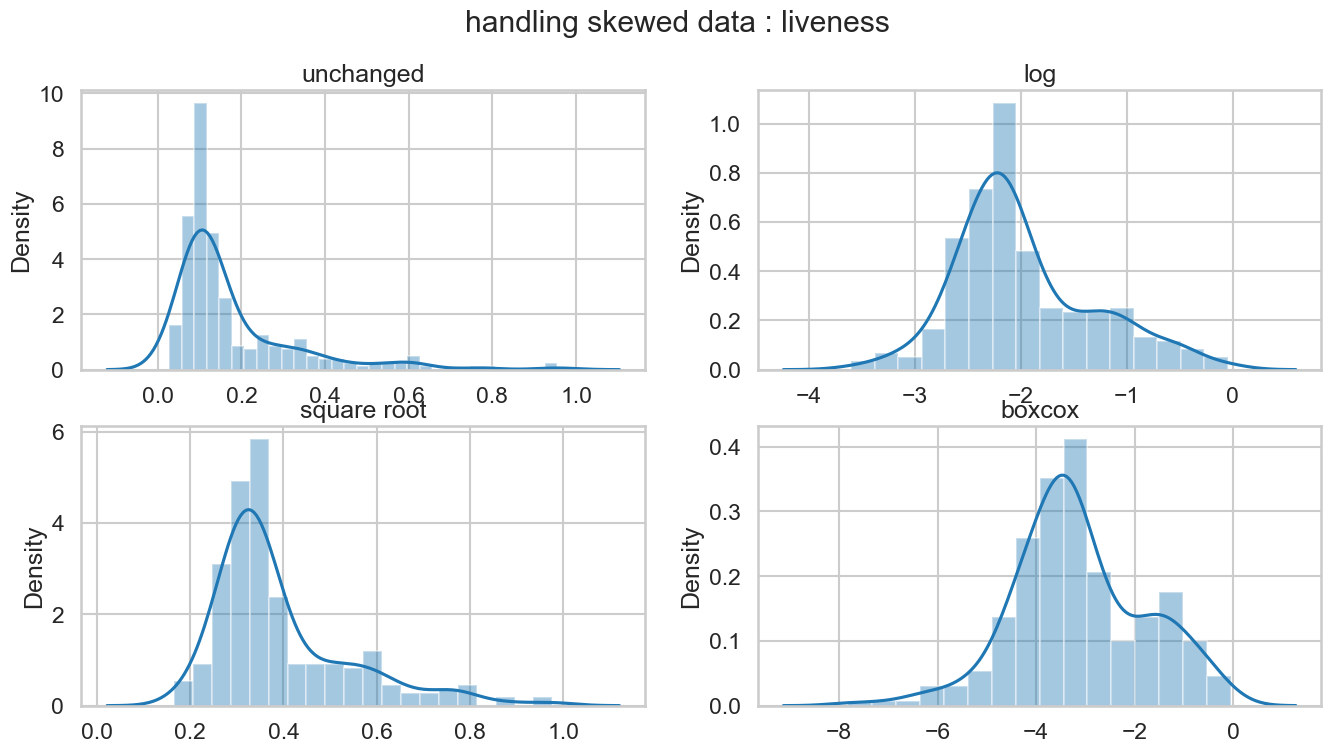

the skewness for 
original is  2.3962031116959146
log is 0.7146840246171221
sqrt is 1.5357589056112668
boxcox is -0.0007717703163606993


In [27]:
fig, axes = plt.subplots(2,2,figsize=(16,8))
fig.suptitle('handling skewed data : liveness ')

sns.distplot(play.liveness,ax=axes[0,0]).set(xlabel=None)#hue = 'playlist'
axes[0,0].set_title('unchanged')

sns.distplot( np.log(play.liveness),ax=axes[0,1]).set(xlabel=None)
axes[0,1].set_title('log')

sns.distplot(np.sqrt(play.liveness),ax=axes[1,0]).set(xlabel=None)
axes[1,0].set_title('square root')

boc,lmbda=sci.stats.boxcox(play.liveness,lmbda=None)
sns.distplot( boc,ax=axes[1,1]).set(xlabel=None)
axes[1,1].set_title('boxcox')

plt.show()
print('the skewness for ')
print('original is ',skew(play.liveness))
print('log is',skew(np.log(play.liveness)),)
print('sqrt is',skew(np.sqrt(play.liveness)),)
boc,lmbda=boxcox(play.liveness,lmbda=None)
print('boxcox is',skew(boc))

In [28]:
comp = play.select_dtypes(include='float64').apply(lambda x : 
                                    [sci.stats.skew(x),
                                     sci.stats.kurtosis(x),
                                     x.mean(),x.median()]).T

comp.columns = ['skewness','kurtosis','mean','median']
comp
#play.select_dtypes(include='float64').skew().sort_values(ascending=False)

,skewness,kurtosis,mean,median
danceability,-0.337238,-0.273426,0.596424,0.607000
loudness,-1.192308,2.044824,-9.036393,-8.371000
tempo,0.283891,-0.518517,118.654215,119.978500
acousticness,0.384771,-1.289334,0.380513,0.322500
energy,-0.312131,-0.609812,0.565554,0.563500
valence,0.032628,-1.031925,0.491365,0.503000
liveness,2.396203,6.560374,0.176782,0.117000
speechiness,2.243251,4.516568,0.087524,0.044200
instrumentalness,3.745486,13.525087,0.050594,0.000064
duration_m,1.169630,4.782837,3.861000,3.660000


In [27]:
#sns.pairplot(play, hue='playlist')

In [28]:
#sns.relplot(data = play , y = 'energy' , x = 'acousticness', hue = 'mode',height = 7 , aspect=1.5 , palette = 'rainbow')
#sns.rugplot(data = play , y = 'energy' , x = 'acousticness' )

In [29]:
#round(play.groupby(['mode','playlist'])['key'].count()/play.groupby('playlist')['playlist'].count() * 100)

In [30]:
#ax = sns.catplot(data = play,y='valence', x = 'playlist', kind = 'box', hue = 'mode')
#ax.set_xticklabels(rotation=30)


In [31]:
#ax = sns.catplot(data = play ,  x = 'playlist'  , kind = 'count', hue = 'decade' , col = 'mode')
#ax.set_xticklabels(rotation=45)
#ax.fig.set_figwidth(15)
#ax.fig.set_figheight(5)

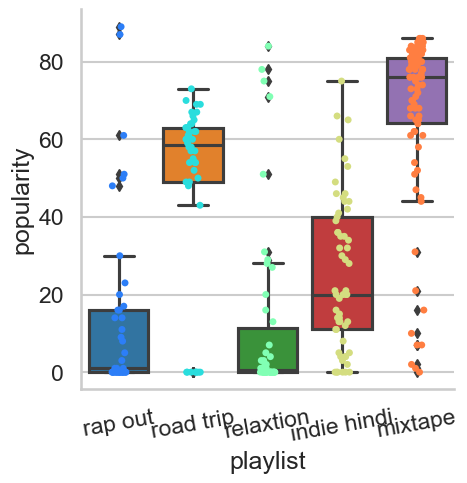

In [29]:

ax = sns.catplot(data = play , y ='popularity' , x = 'playlist' , kind = 'box' )
sns.stripplot(data = play , y = 'popularity', x = 'playlist',palette='rainbow')
ax.set_xticklabels(rotation=10)
#ax.fig.set_figwidth(8)
#ax.fig.set_figheight(5)

#t1 = go.Box(y = play.danceability, name = 'danceability' , text = play.trackName,color = 'explicit')
#data = [t1]
#iplot(data)

In [33]:
#ax = sns.catplot(data = play , y ='energy' , x = 'playlist', col = 'mode' , kind = 'box' )
#ax.set_xticklabels(rotation=10)

In [34]:
#fig = px.box(play, color='playlist', y='popularity',points="all")
#fig.show()
#ax = sns.catplot(data = play , y ='popularity' , x = 'playlist' , kind = 'box' )
#sns.stripplot(data = play , y = 'popularity', x = 'playlist',palette='rainbow')
#ax.set_xticklabels(rotation=10)

In [35]:
#ax = sns.displot(data = play ,  x = 'speechiness', kind = 'hist', col = 'playlist' , y = 'energy', aspect = 0.8)
#g = sns.JointGrid(data=play, x="danceability", y="energy" )
#g.plot_joint(sns.regplot)
#g.plot_marginals(sns.boxplot)


t1 = play[play.playlist == 'relaxtion']
trace1 = go.Scatter(y = t1.energy , x = t1.acousticness,
                    mode = "markers",
                    name = "relaxtion",
                    text= t1.trackName )

t2 = play[play.playlist == 'road trip']
trace2 = go.Scatter(y = t2.energy , x = t2.acousticness,
                    mode = "markers",
                    name = "road trip",
                    text= t2.trackName )

t3 = play[play.playlist == 'mixtape']
trace3 = go.Scatter(y = t3.energy , x = t3.acousticness,
                    mode = "markers",
                    name = "mixtape",
                    text= t3.trackName )

t4 = play[play.playlist == 'rap out']
trace4 = go.Scatter(y = t4.energy , x = t4.acousticness,
                    mode = "markers",
                    name = "rap out",
                    text= t4.trackName )

t5 = play[play.playlist == 'indie hindi']
trace5 = go.Scatter(y = t5.energy , x = t5.acousticness,
                    mode = "markers",
                    name = "indie hindi",
                    text= t5.trackName )


data = [trace1 , trace2 , trace3 , trace4 , trace5 ]

layout = dict(title = ' acousticness v/s energy ',
              xaxis= dict(title= 'acousticness',ticklen= 5),
              yaxis= dict(title= 'energy',ticklen= 5))

fig= dict(data = data,layout=layout)
iplot(fig)


In [36]:
play.head(3)

,artistName,artistName_1,albumName,trackName,release_date,album_type,id,explicit,popularity,danceability,...,valence,liveness,speechiness,instrumentalness,key,time_signature,mode,playlist,duration_m,decade
0,Prabh Deep,Prabh Deep,Maya,Maya,2019-05-13,single,5eR1O5GNIN7kTtfxgg2NFh,False,0,0.852,...,0.640,0.109,0.242,0.000053,9,4,0,rap out,4.57,2010's
1,Prabh Deep,Prabh Deep,Amar,Amar,2019-06-19,single,57onkj1hvlwkekdwo6LlCf,False,0,0.772,...,0.389,0.110,0.321,0.000003,1,4,0,rap out,4.55,2010's
2,Prabh Deep,Prabh Deep,Kala,Kala,2019-06-03,single,4rTVcvaTwgYVb1bKxePYzF,False,0,0.760,...,0.904,0.111,0.484,0.000000,8,4,1,rap out,3.51,2010's


# radar plot comparing two variables

In [ ]:
x0 = "road trip"
x = play[play.playlist == x0 ]
#x = play[play['decade'] == x0]
#x = play[play.trackName == x0]

y0 = "indie hindi"
y = play[play.playlist == y0 ]   
#y = play[play['decade'] == y0]
#y = play[play.trackName == y0]



def radar_plot(x , x0 , y , y0) : 
    
    t1 = go.Scatterpolar(r = [ x['acousticness'].mean() ,
                           x['instrumentalness'].mean() ,
                           x['danceability'].mean() , 
                           x['energy'].mean() ,
                           x['valence'].mean() ,
                           x['speechiness'].mean() ,
                           x['acousticness'].mean() ] ,
                    theta = ['acousticness','instrumentalness','danceability','energy','valence','speechiness','acousticness'],
                    fill = 'toself' , name  = x0)
    
    t2 = go.Scatterpolar(r = [ y['acousticness'].mean() ,
                           y['instrumentalness'].mean() ,
                           y['danceability'].mean() , 
                           y['energy'].mean() ,
                           y['valence'].mean() ,
                           y['speechiness'].mean() ,
                           y['acousticness'].mean() ],
                    theta = ['acousticness','instrumentalness','danceability','energy','valence','speechiness','acousticness'],
                    fill = 'toself' , name  = y0 )


    data = [t1,t2]
    layout = go.Layout( polar = dict ( radialaxis = dict( visible = True , range = [0, 1] ) ), 
                                 title = 'Mixtape v/s indie hindi' ) 

    fig = go.Figure(data=data, layout=layout)
    return iplot(fig)

In [37]:
#radar_plot(x , x0 , y , y0)

test = play[play.playlist == 'mixtape']
t1 = go.Box(y = test.danceability, name = 'danceability' , text = test.trackName,boxpoints="all")
#t2 = go.Box(y = test.loudness, name = 'loudness' , text = test.trackName)
t3 = go.Box(y = test.acousticness, name = 'acousticness' , text = test.trackName,boxpoints="all")
t4 = go.Box(y = test.energy, name = 'energy' , text = test.trackName,boxpoints="all" )
t5 = go.Box(y = test.valence, name = 'valence' , text = test.trackName,boxpoints="all")
t6 = go.Box(y = test.speechiness, name = 'speechiness' , text = test.trackName,boxpoints="all")
#t7 = go.Box(y = test.duration_m, name = 'duration_m' , text = test.trackName)
#t8 = go.Box(y = test.tempo, name = 'tempo' , text = test.trackName)
t9 = go.Box(y = test.instrumentalness, name = 'instrumentalness' , text = test.trackName,boxpoints="all")
data = [t1,t3,t4,t5,t6,t9]
layout = go.Layout( title = test.playlist.values[0] + ' analysis' )

fig = go.Figure(data=data, layout=layout)
iplot(fig)

fig = px.sunburst(play, path=['playlist', 'decade' , 'mode' ], values='duration_m')
fig.show()

# Transforming the data

In [38]:
def transform(x):
    if skew(x) > 1 :
        if pd.Series(x<=0).any() :
            x = np.log(x+1.5)
            #print('significantly positive skewed with 0 values')
        else :
            x = np.log(x)
            #print('significantly positive skewed')
    elif skew(x) > 0.5  :
        x = np.sqrt(x)
        #print('moderately positive skewed')
    elif skew(x) < -1 :
        x = np.log(2-x)
        #print('significantly negetive skewed')
    elif skew(x) < -0.5 :
        x = np.sqrt(2-x)
        #print('moderately negetive skewed')
    else :
        None 
        #print('approx symmetric')
    
    return x


In [39]:
cols = play.select_dtypes(include='float64')
cols = cols.drop('duration_m',axis=1)
cols = cols.apply(lambda x : transform(x))
play1[cols.columns] = cols

this is different transformation method : Box Cox

In [40]:
def transform1(x):
    if pd.Series(x<=0).any() :
        x = np.log(x+1.5)
    else :
        if skew(x) > 0.5 or skew(x) < -0.5 :
            bcx,lmbda = boxcox(play.liveness,lmbda=None)
            x = bcx
        else : 
            x = x 
    return x

# lets preprocess the data first

seperating target and independent variables

In [41]:
X = play1.select_dtypes(exclude=['object']) 
X = X.drop('release_date',axis=1)

y = play1['playlist'] 

Label encoders

In [42]:
le = LabelEncoder()
oe = OrdinalEncoder()
scaler = MinMaxScaler() 

In [43]:
object_cols = ['albumName','artistName','album_type','decade',]
play_oe = pd.DataFrame(oe.fit_transform(play[object_cols]))
X[object_cols] = play_oe

In [44]:
y_le = le.fit_transform(y) # inverse_transforms


Scaling the data

In [45]:
#col = ['loudness','tempo',]
#X_normalized = scaler.fit_transform(play[col])
#X[col] = X_normalized


# train test split

In [46]:

#skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=1)
#for train_index, test_index in skf.split(X, y):
#    print("TRAIN:", train_index, "TEST:", test_index)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 , random_state=5 , stratify = y )
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(187, 19)
(187,)
(93, 19)
(93,)


In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier

# now apply machine learning models to it 

In [49]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF',RandomForestClassifier()))
#models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean() , cv_results.std()))


LR: 0.635714 (0.051260)
LDA: 0.689286 (0.034993)
KNN: 0.471429 (0.053690)
CART: 0.610714 (0.066240)
NB: 0.642857 (0.051755)
RF: 0.717857 (0.069068)


In [51]:
#score_dataset(X_train, X_test, y_train, y_test)

# lets start with decisiontree

# DecisionTreeClassifier

error_rate=[]
for i in range(1,100):
            knn = DecisionTreeClassifier(max_depth=i)
            model = knn.fit(X_train,y_train)
            pred_i = knn.predict(X_test)
            error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(13,8))
plt.plot(range(1,100), error_rate, linestyle = 'dotted', marker = 'o',color = 'g')
plt.xlabel('K value')
plt.ylabel('Error Rate')
plt.title('K value Vs Error Rate')
plt.show() 

              precision    recall  f1-score   support

 indie hindi       0.47      0.45      0.46        20
     mixtape       0.90      0.83      0.86        23
     rap out       0.82      0.70      0.76        20
   relaxtion       0.68      0.87      0.76        15
   road trip       0.71      0.80      0.75        15

    accuracy                           0.72        93
   macro avg       0.72      0.73      0.72        93
weighted avg       0.73      0.72      0.72        93

0.7204301075268817 is the accuracy
0.6514758411198943 is the matthews_corrcoef


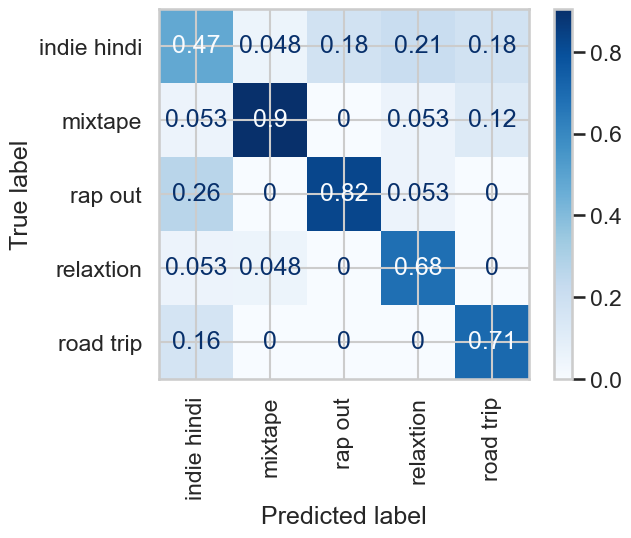

In [52]:
model = DecisionTreeClassifier(max_depth=6).fit(X_train, y_train)
pred = model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,pred,cmap=plt.cm.Blues,xticks_rotation='vertical',normalize='pred')
print(classification_report(y_test,pred))
print(metrics.accuracy_score(y_test, pred),"is the accuracy")
print(matthews_corrcoef(y_test, pred),"is the matthews_corrcoef")



              precision    recall  f1-score   support

 indie hindi       0.57      0.65      0.60        20
     mixtape       0.77      0.87      0.82        23
     rap out       0.88      0.75      0.81        20
   relaxtion       0.75      0.80      0.77        15
   road trip       0.73      0.53      0.62        15

    accuracy                           0.73        93
   macro avg       0.74      0.72      0.72        93
weighted avg       0.74      0.73      0.73        93

0.7311827956989247 is the accuracy
0.6625297069836148 is the matthews_corrcoef


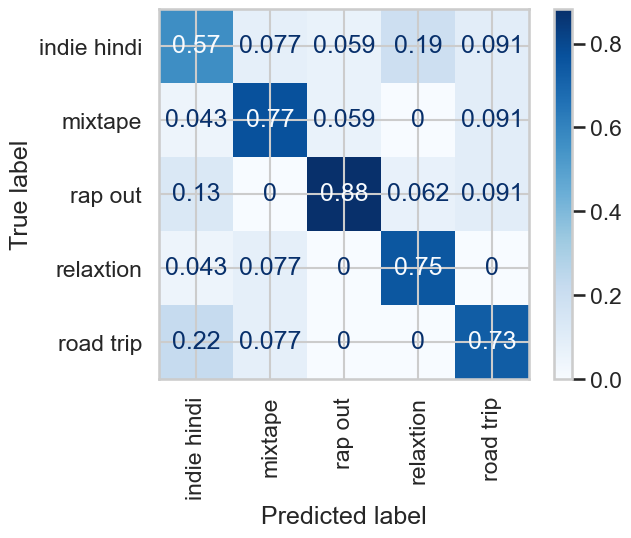

In [53]:
model = RandomForestClassifier().fit(X_train,y_train)
pred = model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,pred,cmap=plt.cm.Blues,xticks_rotation='vertical',normalize='pred')
print(classification_report(y_test,pred))
print(metrics.accuracy_score(y_test, pred),"is the accuracy")
print(matthews_corrcoef(y_test, pred),"is the matthews_corrcoef")

# logistic regression

              precision    recall  f1-score   support

 indie hindi       0.67      0.40      0.50        20
     mixtape       0.79      0.83      0.81        23
     rap out       0.81      0.85      0.83        20
   relaxtion       0.62      0.87      0.72        15
   road trip       0.53      0.53      0.53        15

    accuracy                           0.70        93
   macro avg       0.68      0.70      0.68        93
weighted avg       0.70      0.70      0.69        93

0.6989247311827957 is the accuracy
0.6270853608726917 is the matthews_corrcoef


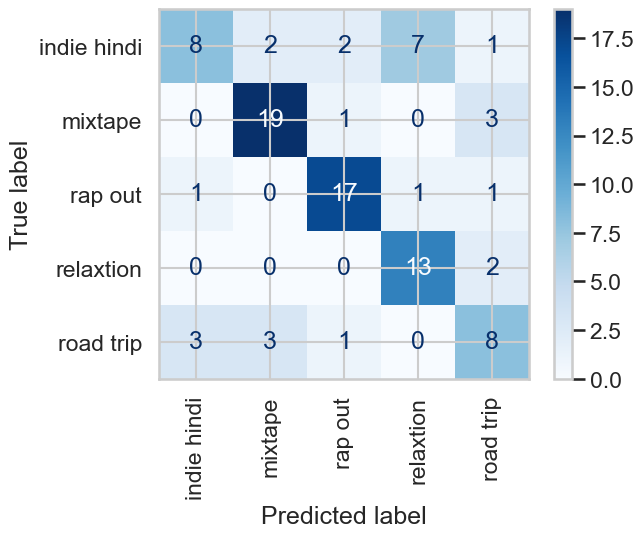

In [54]:
model = LogisticRegression(multi_class='ovr', solver='liblinear').fit(X_train,y_train)
pred = model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,pred,cmap=plt.cm.Blues,xticks_rotation='vertical')
print(classification_report(y_test,pred))
print(metrics.accuracy_score(y_test, pred),"is the accuracy")
print(matthews_corrcoef(y_test, pred),"is the matthews_corrcoef")

# naive bayes

              precision    recall  f1-score   support

 indie hindi       0.44      0.90      0.59        20
     mixtape       1.00      0.70      0.82        23
     rap out       0.85      0.55      0.67        20
   relaxtion       0.80      0.53      0.64        15
   road trip       0.69      0.60      0.64        15

    accuracy                           0.67        93
   macro avg       0.76      0.66      0.67        93
weighted avg       0.76      0.67      0.68        93

0.6666666666666666 is the accuracy
0.6051568301418503 is the matthews_corrcoef


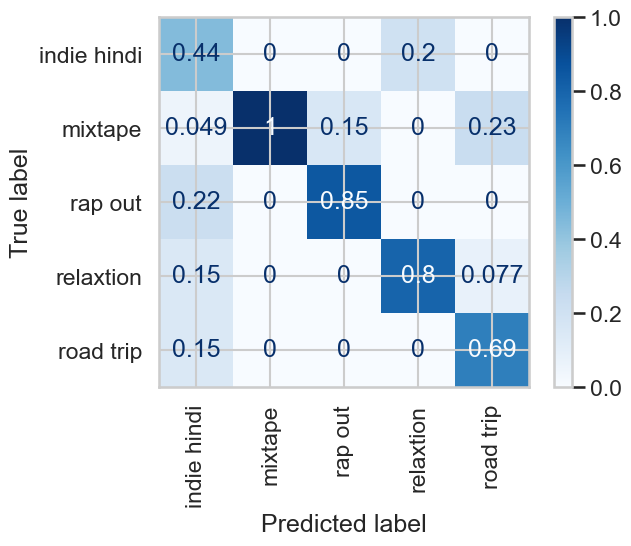

In [55]:
model = GaussianNB().fit(X_train, y_train)
pred = model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,pred,cmap=plt.cm.Blues,xticks_rotation='vertical',normalize='pred')
print(classification_report(y_test,pred))
print(metrics.accuracy_score(y_test, pred),"is the accuracy")
print(matthews_corrcoef(y_test, pred),"is the matthews_corrcoef")